# Upper Confidence Bound (UCB)

## Importing the libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [28]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [29]:
import math #para depois usar raiz quadrada
N = 10000 #number of user (linhas)
d = 10 #number of ads (colunas)
ads_selected = [] #lista que ira guardar ads selecionadas por cada ronda. Serao 10.000 rondas
numbers_of_selections = [0] * d #lista para cada utilizador a começar com tudo a 0. Só irá ter 1 quando a ad for selecionada
sums_of_rewards = [0] * d #lista de somatorio de rewards para cada utilizador a começar com tudo a 0.
total_reward = 0 #soma dos rewards
for n in range(0, N): #ciclo for para percorrer cada utilizador
  ad = 0 #seguir pelas ads de cada user
  max_upper_bound = 0 # para ir guardando o top upper bound descoberto
  for i in range(0, d): #ciclo for para percorrer cada ad
    if (numbers_of_selections[i] > 0): #caso tenha sido selecionado
      average_reward = sums_of_rewards[i] / numbers_of_selections[i] #media de rewards dessa ad vai ser o somatorio das rewards a dividir pelo numero de selecoes
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) #formula do delta i
      upper_bound = average_reward + delta_i #upperbound sera a avg reward + o delta i
    else: #caso ad nao tenha sido selecionada
      #selecionamos (pois n queremos divisao por 0)
      upper_bound = 1e400 #colocamos a upper_bound altissima para a ad que tava a 0 ser selecionada
    if (upper_bound > max_upper_bound): #caso o upper_bound seja maior que o max_upper_bound
        max_upper_bound = upper_bound #max_upper_bound passa a ser o upper_bound
        ad = i
#atualizar variaveis definidas inicialmente (MT IMPORTANTE ESPAÇO ANTES!!)
  ads_selected.append(ad) #juntar a ad à lista de ads selected
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #adicionar 1 a ad selecionada para ir percorrendo
  reward = dataset.values[n, ad] #aceder ao dataset ir buscar a reward pela ad em questao
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward #somatorio
  total_reward = total_reward + reward #total anterior + a reward da ultima




## Visualising the results

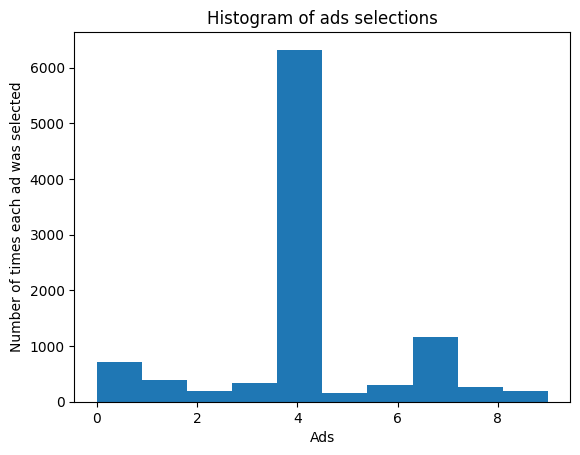

In [30]:
plt.hist(ads_selected) #histograma das ads selecionadas
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
#Demonstra que a ad mais selecionada é a 4.
#Queremos o menor numero de rondas para identificar essa ad. Como ver? Alterar o N e experimentar. Com 5000, 1000 deu. Com 500 já não.